
<br>

# 获取数据：GMD

数据分析的第一步是获取数据。本章将介绍如何从 [Global Macro Data](https://www.globalmacrodata.com) 获取全球宏观经济数据。该数据库涵盖了 243 个国家和地区的 46 个宏观经济变量，包括投资占GDP比重（inv_GDP）、出口占GDP 比重（exports_GDP）、政府支出占 GDP 比重（govexp_GDP）等。
有关该数据库的详细介绍参见：[GMD：最新全球宏观数据库-243个国家46个宏观变量](https://www.lianxh.cn/details/1559.html)。

我们将详细讲解以下内容：

1. 数据获取与清洗：如何下载并加载数据，处理缺失值和异常值。
2. 生成新变量：例如以美元计价的出口数据、出口占比等。
3. 数据可视化：通过静态和动态图表展示全球宏观经济趋势，包括时间序列图、堆积面积图和动画图表。

通过本章的学习，您将掌握从数据获取到可视化分析的完整流程，为后续的深入研究奠定基础。

## 将数据下载到本地

我们需要为本项目设定一个文件夹，将所有数据与脚本统一存放，例如 `D:\Github\dslian\body`。用 `os.chdir()` 切过去后，接着通过 `pd.read_csv()` 直接从网址读取 `GMD.csv`，约 9 MB，十余秒即可载入为 `DataFrame`。最后用 `to_csv()` 保存到本地 `data` 子目录，并设定 `index=False`，既留备份，也便于离线复现。


In [1]:
import pandas as pd
import os

os.chdir(r"D:\Github\dslian\body")  # 修改为你的工作路径

# 获取数据并加载到 DataFrame
''' 9M 左右，下载需要 10-15 秒
url = "https://www.globalmacrodata.com/GMD.csv"
data = pd.read_csv(url)

# 保存数据到 data 文件夹下
data.to_csv("data/GMD.csv", index=False)
'''

# 从 data 文件夹读取数据
data = pd.read_csv("data/GMD.csv")

# 查看前几行数据
print(data.head())
print(data.columns)

  countryname ISO3  year  nGDP  rGDP  rGDP_pc  rGDP_USD  deflator  cons  \
0       Aruba  ABW  1950   NaN   NaN      NaN       NaN       NaN   NaN   
1       Aruba  ABW  1951   NaN   NaN      NaN       NaN       NaN   NaN   
2       Aruba  ABW  1952   NaN   NaN      NaN       NaN       NaN   NaN   
3       Aruba  ABW  1953   NaN   NaN      NaN       NaN       NaN   NaN   
4       Aruba  ABW  1954   NaN   NaN      NaN       NaN       NaN   NaN   

   rcons  ...  ltrate  cbrate  M0  M1  M2  M3  M4  SovDebtCrisis  \
0    NaN  ...     NaN     NaN NaN NaN NaN NaN NaN            NaN   
1    NaN  ...     NaN     NaN NaN NaN NaN NaN NaN            NaN   
2    NaN  ...     NaN     NaN NaN NaN NaN NaN NaN            NaN   
3    NaN  ...     NaN     NaN NaN NaN NaN NaN NaN            NaN   
4    NaN  ...     NaN     NaN NaN NaN NaN NaN NaN            NaN   

   CurrencyCrisis  BankingCrisis  
0             NaN            NaN  
1             NaN            NaN  
2             NaN            NaN  


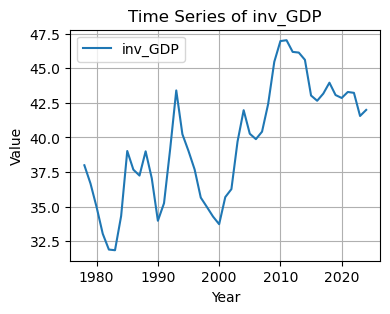

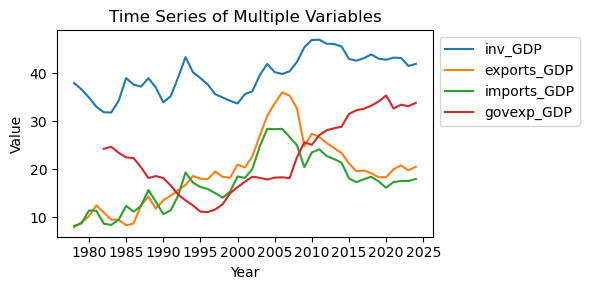

In [10]:
import matplotlib.pyplot as plt

# 选择变量列表和国家
vlist = ["inv_GDP", "exports_GDP", "imports_GDP", "govexp_GDP"]
cname = "CHN"

# 筛选出指定国家的数据
china_data = data[data["ISO3"] == cname]

# 选择样本范围
china_data = china_data[(china_data["year"] >= 1978) & (china_data["year"] <= 2024)]

# 绘制简单的时序图
plt.figure(figsize=(4, 3))
plt.plot(china_data["year"], china_data["inv_GDP"], label="inv_GDP")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Time Series of inv_GDP")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# 绘制多变量时序图
plt.figure(figsize=(6, 3))
for var in vlist:
    plt.plot(china_data["year"], china_data[var], label=var)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Time Series of Multiple Variables")
plt.xticks(range(1980, 2026, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.show()

### 更好的版本

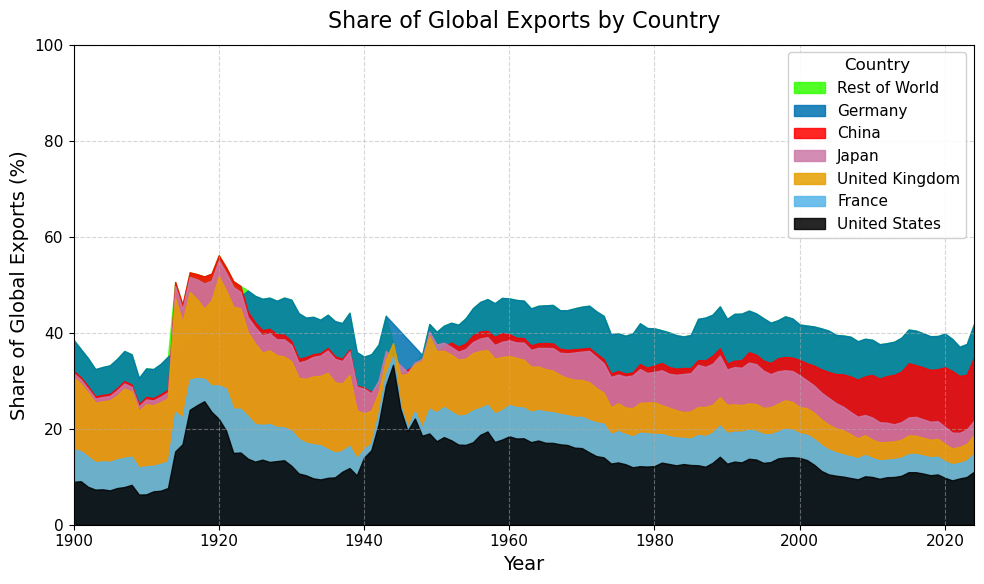

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 读取数据
data = pd.read_csv("data/GMD.csv")

# 定义年份范围与国家代码
start_year = 1900
end_year = 2024
cname = ["USA", "DEU", "FRA", "GBR", "JPN", "CHN"]

# 创建以美元计价的出口数据
data["exports_USD"] = data["exports"] / data["USDfx"]

# 删除数据质量较差的国家
invalid_countries = ["MMR", "SLE", "ROU", "ZWE", "POL", "YUG"]
data = data[~data["ISO3"].isin(invalid_countries)]

# 保留必要变量并选择样本区间
data = data[["ISO3", "year", "exports_USD"]].dropna()
data = data[(data["year"] >= start_year) & (data["year"] <= end_year)]

# 等价写法
data = data.query("@start_year <= year <= @end_year")
# 筛选出年份在指定范围内的数据
# 使用 start_year 和 end_year 变量定义的年份范围进行过滤
# 这里使用了 @varname 的方式来引用变量，@ 符号用于在 query 方法中直接引用 Python 变量
# 这种写法允许我们在 Pandas 的 query 方法中使用 Python 变量进行动态过滤

# 计算每年全球总出口额
data["total_exports"] = data.groupby("year")["exports_USD"].transform("sum")

# 计算每个国家出口占比
data["export_share"] = (data["exports_USD"] / data["total_exports"]) * 100

# 保留目标国家与其他国家
data = data[data["ISO3"].isin(cname) | (data["ISO3"] != "")]

# 计算其他国家（ROW）的出口占比
data["selected_sum"] = data.groupby("year")["export_share"].transform(
    lambda x: x if data["ISO3"].isin(cname).any() else 0
)
data["ROW_sum"] = data.groupby("year")["export_share"].transform(
    lambda x: x if ~data["ISO3"].isin(cname).any() else 0
)

# 创建排名变量并标注 ROW 与各国家
rank_map = {"USA": 1, "FRA": 2, "GBR": 3, "JPN": 4, "CHN": 5, "DEU": 6}
data["rank"] = data["ISO3"].map(rank_map)
data.loc[~data["ISO3"].isin(cname), "ISO3"] = "ROW"
data.loc[data["ISO3"] == "ROW", "export_share"] = data["ROW_sum"]

# 保留唯一值并排序，计算累计占比
data = data.drop_duplicates(subset=["ISO3", "year"]).sort_values(by=["year", "rank"])
data["cum_share"] = data.groupby("year")["export_share"].cumsum()

# 设置图形样式
mpl.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.dpi": 100,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5
})

# 定义配色方案（对比度高）
bright_colors = {
    "ROW": "#33FF00",    # lime green
    "DEU": "#0072B2",    # blue
    "CHN": "#FF0000",    # red
    "JPN": "#CC79A7",    # purple pink
    "GBR": "#E69F00",    # orange
    "FRA": "#56B4E9",    # sky blue
    "USA": "#000000",    # black
}

# 定义图例名称映射（替换 ISO3 为更易懂的国家名）
label_map = {
    "ROW": "Rest of World",
    "USA": "United States",
    "DEU": "Germany",
    "FRA": "France",
    "GBR": "United Kingdom",
    "JPN": "Japan",
    "CHN": "China"
}

# 绘制图形
plt.figure(figsize=(10, 6))
for country in ["ROW", "DEU", "CHN", "JPN", "GBR", "FRA", "USA"]:
    subset = data[data["ISO3"] == country]
    plt.fill_between(subset["year"], 
                     subset["cum_share"],
                     label=label_map[country],
                     color=bright_colors[country],
                     alpha=0.85)

# 设置标题、标签和图例
plt.xlabel("Year")
plt.ylabel("Share of Global Exports (%)")
plt.title("Share of Global Exports by Country", pad=12)
plt.ylim(0, 100)
plt.xlim(start_year, end_year)

# 图例设置：右上角、白色背景、透明框
plt.legend(title="Country", loc="upper right", frameon=True, framealpha=0.9, facecolor="white")
plt.tight_layout()
plt.show()


### 动态图形

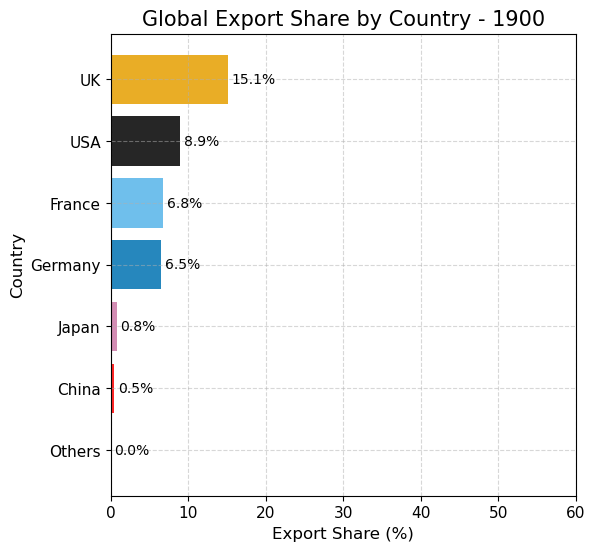

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation

# 下载数据
# url = "https://www.globalmacrodata.com/GMD.csv"
# data = pd.read_csv(url)

# 读取数据
data = pd.read_csv("data/GMD.csv")

# 参数设置
start_year = 1900
end_year = 2024
year_interval = 2  # 动画间隔
years = list(range(start_year, end_year + 1, year_interval))
cname = ["USA", "DEU", "FRA", "GBR", "JPN", "CHN"]

# 数据处理
# 将出口数据转换为以美元计价
data["exports_USD"] = data["exports"] / data["USDfx"]

# 删除数据质量较差的国家
data = data[~data["ISO3"].isin(["MMR", "SLE", "ROU", "ZWE", "POL", "YUG"])]

# 保留必要的变量并删除缺失值
data = data[["ISO3", "year", "exports_USD"]].dropna()

# 筛选出指定年份范围内的数据
data = data[(data["year"] >= start_year) & (data["year"] <= end_year)]

# 计算每年全球总出口额
data["total_exports"] = data.groupby("year")["exports_USD"].transform("sum")

# 计算每个国家的出口占比
data["export_share"] = data["exports_USD"] / data["total_exports"] * 100

# 保留目标国家和其他国家的数据
data = data[data["ISO3"].isin(cname) | (data["ISO3"] != "")]

# 计算目标国家的出口占比总和
data["selected_sum"] = data.groupby("year")["export_share"].transform(
    lambda x: x if data["ISO3"].isin(cname).any() else 0
)

# 计算其他国家（ROW）的出口占比总和
data["ROW_sum"] = data.groupby("year")["export_share"].transform(
    lambda x: x if ~data["ISO3"].isin(cname).any() else 0
)

# 将非目标国家标记为 "ROW" 并更新其出口占比
data.loc[~data["ISO3"].isin(cname), "ISO3"] = "ROW"
data.loc[data["ISO3"] == "ROW", "export_share"] = data["ROW_sum"]

# 删除重复值，确保每个国家每年只有一条记录
data = data.drop_duplicates(subset=["ISO3", "year"])

# 设置样式
mpl.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 15,
    "axes.labelsize": 12,
    "figure.dpi": 100,
    "figure.facecolor": "white",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5
})

# 颜色与国家名映射
bright_colors = {
    "ROW": "#33FF00",
    "DEU": "#0072B2",
    "CHN": "#FF0000",
    "JPN": "#CC79A7",
    "GBR": "#E69F00",
    "FRA": "#56B4E9",
    "USA": "#000000",
}
label_map = {
    "ROW": "Others",
    "USA": "USA",
    "DEU": "Germany",
    "FRA": "France",
    "GBR": "UK",
    "JPN": "Japan",
    "CHN": "China"
}

# 创建动画
fig, ax = plt.subplots(figsize=(6, 6))

def update(year):
    ax.clear()
    year_data = data[data["year"] == year].copy()
    year_data = year_data.groupby("ISO3")["export_share"].sum().reset_index()
    year_data = year_data.sort_values("export_share", ascending=True)
    
    bars = ax.barh(
        [label_map[c] for c in year_data["ISO3"]],
        year_data["export_share"],
        color=[bright_colors.get(c, "#999999") for c in year_data["ISO3"]],
        alpha=0.85
    )
    
    for bar, val in zip(bars, year_data["export_share"]):
        ax.text(val + 0.5, bar.get_y() + bar.get_height()/2,
                f"{val:.1f}%", va='center', fontsize=10)

    ax.set_xlim(0, 60)
    ax.set_title(f"Global Export Share by Country - {year}")
    ax.set_xlabel("Export Share (%)")
    ax.set_ylabel("Country")
    ax.grid(True, axis="x", linestyle="--", alpha=0.5)

ani = animation.FuncAnimation(fig, update, frames=years, interval=600, repeat=False)

# 保存动画（也可改为 .mp4 需要 ffmpeg）
ani.save("figs/export_share_animation.gif", writer="pillow", dpi=120)


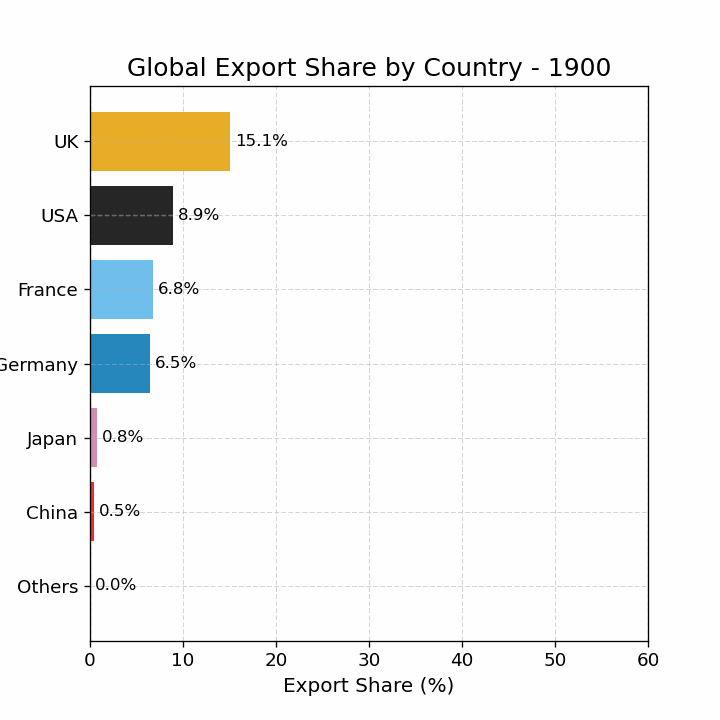

In [ ]:
# 显示 GIF 动图
from IPython.display import Image
Image(filename="figs/export_share_animation.gif")


![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/export_share_animation.gif)

## 柱状图


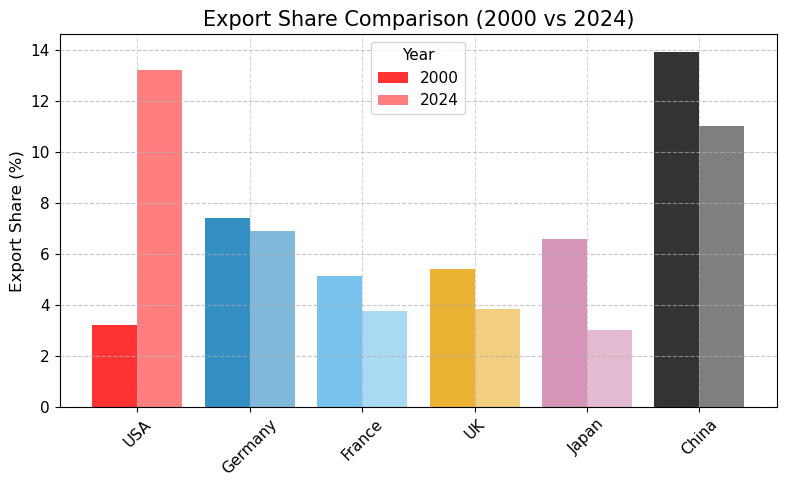

In [14]:
# 筛选 2000 年和 2024 年的数据
selected_years = [2000, 2024]
filtered_data = data[data["year"].isin(selected_years) & data["ISO3"].isin(cname)]

# 按年份和国家排序
filtered_data = filtered_data.sort_values(by=["year", "ISO3"])

# 绘制柱状图
fig, ax = plt.subplots(figsize=(8, 5))

# 定义颜色映射
colors = [bright_colors[c] for c in filtered_data["ISO3"]]

# 绘制 2000 年和 2024 年的柱状图
width = 0.4
x_2000 = range(len(cname))
x_2024 = [x + width for x in x_2000]

data_2000 = filtered_data[filtered_data["year"] == 2000]["export_share"]
data_2024 = filtered_data[filtered_data["year"] == 2024]["export_share"]

ax.bar(x_2000, data_2000, width=width, label="2000", color=colors, alpha=0.8)
ax.bar(x_2024, data_2024, width=width, label="2024", color=colors, alpha=0.5)

# 设置标签和标题
ax.set_xticks([x + width / 2 for x in x_2000])
ax.set_xticklabels([label_map[c] for c in cname], rotation=45)
ax.set_ylabel("Export Share (%)")
ax.set_title("Export Share Comparison (2000 vs 2024)")
ax.legend(title="Year")

# 显示网格
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

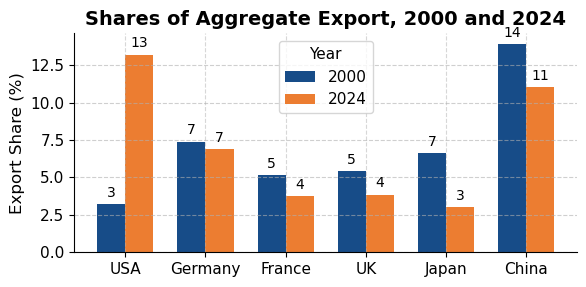

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 cname 顺序为：["USA", "CHN", "DEU", "JPN", "FRA", "GBR"]
# label_map 是国家名映射，如 {"USA": "美国", ...}

# 筛选 2000 和 2024 年
selected_years = [2000, 2024]
filtered_data = data[data["year"].isin(selected_years) & data["ISO3"].isin(cname)]
filtered_data = filtered_data.sort_values(by=["year", "ISO3"])

# 准备数据
data_2000 = filtered_data[filtered_data["year"] == 2000]["export_share"].values
data_2024 = filtered_data[filtered_data["year"] == 2024]["export_share"].values

# 位置设置
x = np.arange(len(cname))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 3))

# 绘图（采用 Figure 9B 的配色风格）
bars1 = ax.bar(x - width / 2, data_2000, width, label="2000", color="#174c88")  # 深蓝色
bars2 = ax.bar(x + width / 2, data_2024, width, label="2024", color="#ec7d31")  # 橙色

# 添加文字标签
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(bars1)
autolabel(bars2)

# 设定坐标轴和标题
ax.set_ylabel("Export Share (%)", fontsize=12)
ax.set_title("Shares of Aggregate Export, 2000 and 2024", fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels([label_map[c] for c in cname], rotation=0)
ax.legend(title="Year")

# 添加 y 轴网格线
ax.yaxis.grid(True, linestyle="--", alpha=0.6)

# 清理图框边线
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


在上图中，`export_share` 是每个国家的出口额占全球总出口额的百分比，其定义公式如下：

$$
\text{export\_share} = \frac{\text{exports\_USD}}{\text{total\_exports}} \times 100
$$

其中：
- `exports_USD` 是该国家的出口额（以美元计价）。
- `total_exports` 是当年全球所有国家的出口总额（以美元计价）。
- 结果乘以 100，将比例转换为百分比。

这个指标表示某个国家在全球出口总额中所占的份额，用于衡量该国家在全球贸易中的相对重要性。

`export_share` 和 `cum_share` 的区别在于它们的计算方式和用途：

1. **`export_share`**:
    - 表示某个国家在某一年中，其出口额占全球总出口额的百分比。
    - 是一个单独国家的指标，直接反映该国家在全球出口中的相对重要性。
    - 计算公式为：

      $$
      \mathrm{export\_share} = \frac{\mathrm{exports\_USD}}{\mathrm{total\_exports}} \times 100
      $$

2. **`cum_share`**:
    - 表示某一年中，按国家排名累加的出口占比。
    - 是一个累计指标，反映从排名靠前的国家开始，逐步累加的出口占比。
    - 例如，如果某一年中：
      - 国家 A 的 `export_share` 是 10%，
      - 国家 B 的 `export_share` 是 15%，
      - 国家 C 的 `export_share` 是 20%，
      - 那么它们的 `cum_share` 分别是：
         - 国家 A：10%
         - 国家 B：10% + 15% = 25%
         - 国家 C：10% + 15% + 20% = 45%

### 总结
- `export_share` 是单个国家的出口占比。
- `cum_share` 是按排名累加的出口占比，用于展示多个国家的累计贡献。